[This map](https://covid.cdc.gov/covid-data-tracker/index.html#county-map) is bad. Let's improve it.

First we, need to find the data. Clicking USAFacts.org link below the map takes me [here](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/). There's already a better map there but a) it's an unclassified choropleth and b) I want to make my own. 

Look, there's some links to download data:
- [Known Cases](https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv)  ([cache](https://raw.githubusercontent.com/jamesdamillington/usa-covid-mapping/main/data/covid_deaths_usafacts_2020-10-27.csv) of data on 2020-10-27)
- [County Populations](https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv) ([cache](https://raw.githubusercontent.com/jamesdamillington/usa-covid-mapping/main/data/covid_county_population_usafacts_2020-10-27.csv) of data on 2020-10-27)





Now I need a shapefile to link the county data to. Download a shapefile from [US census website](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html) - we'll use the most coarse resolution (1:20,000,000) to keep things simple. ([cache](https://github.com/jamesdamillington/usa-covid-mapping/tree/main/data/cb_2019_us_county_20m_2020-10-27) of file on 2020-10-27)

In [8]:
import pandas as pd

In [10]:
cty_cases = pd.read_csv("data/covid_confirmed_usafacts_2020-10-27.csv")
cty_cases.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,1966,1983,1989,1999,2010,2021,2023,2030,2048,2059
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,6333,6350,6369,6375,6405,6443,6475,6615,6637,6658
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,968,977,981,981,988,996,997,1012,1031,1033
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,771,775,785,789,791,801,811,825,828,840


In [2]:
import geopandas as gpd

In [4]:
cty_shp = gpd.read_file("data/cb_2019_us_county_20m_2020-10-27/cb_2019_us_county_20m.shp")

In [5]:
cty_shp.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,29,227,00758566,0500000US29227,29227,Worth,06,690564983,493903,"POLYGON ((-94.63203 40.57176, -94.53388 40.570..."
1,31,061,00835852,0500000US31061,31061,Franklin,06,1491355860,487899,"POLYGON ((-99.17940 40.35068, -98.72683 40.350..."
2,36,013,00974105,0500000US36013,36013,Chautauqua,06,2746047476,1139407865,"POLYGON ((-79.76195 42.26986, -79.62748 42.324..."
3,37,181,01008591,0500000US37181,37181,Vance,06,653713542,42178610,"POLYGON ((-78.49773 36.51467, -78.45728 36.541..."
4,47,183,01639799,0500000US47183,47183,Weakley,06,1503107848,3707114,"POLYGON ((-88.94916 36.41010, -88.81642 36.410..."


<AxesSubplot:>

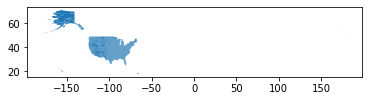

In [6]:
cty_shp.plot()